In [ ]:
import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!unzip "Original.zip"

Archive:  Original.zip
  inflating: Original/cropped_10090824183_d02c613f10_m.jpg  
  inflating: Original/cropped_102501987_3cdb8e5394_n.jpg  
  inflating: Original/cropped_10503217854_e66a804309.jpg  
  inflating: Original/cropped_10894627425_ec76bbc757_n.jpg  
  inflating: Original/cropped_110472418_87b6a3aa98_m.jpg  
  inflating: Original/cropped_11102341464_508d558dfc_n.jpg  
  inflating: Original/cropped_11233672494_d8bf0a3dbf_n.jpg  
  inflating: Original/cropped_11694025703_9a906fedc1_n.jpg  
  inflating: Original/cropped_118974357_0faa23cce9_n.jpg  
  inflating: Original/cropped_11944957684_2cc806276e.jpg  
  inflating: Original/cropped_12165480946_c4a3fe182d_n.jpg  
  inflating: Original/cropped_12202373204_34fb07205b.jpg  
  inflating: Original/cropped_12238827553_cf427bfd51_n.jpg  
  inflating: Original/cropped_12240165555_98625b1e88_n.jpg  
  inflating: Original/cropped_12240303_80d87f77a3_n.jpg  
  inflating: Original/cropped_12240577184_b0de0e53ea_n.jpg  
  inflating: Ori

In [ ]:
!unzip "Extracted"

Archive:  Extracted.zip
  inflating: Extracted/full_10090824183_d02c613f10_m.jpg  
  inflating: Extracted/full_102501987_3cdb8e5394_n.jpg  
  inflating: Extracted/full_10503217854_e66a804309.jpg  
  inflating: Extracted/full_10894627425_ec76bbc757_n.jpg  
  inflating: Extracted/full_110472418_87b6a3aa98_m.jpg  
  inflating: Extracted/full_11102341464_508d558dfc_n.jpg  
  inflating: Extracted/full_11233672494_d8bf0a3dbf_n.jpg  
  inflating: Extracted/full_11694025703_9a906fedc1_n.jpg  
  inflating: Extracted/full_118974357_0faa23cce9_n.jpg  
  inflating: Extracted/full_11944957684_2cc806276e.jpg  
  inflating: Extracted/full_12165480946_c4a3fe182d_n.jpg  
  inflating: Extracted/full_12202373204_34fb07205b.jpg  
  inflating: Extracted/full_12238827553_cf427bfd51_n.jpg  
  inflating: Extracted/full_12240165555_98625b1e88_n.jpg  
  inflating: Extracted/full_12240303_80d87f77a3_n.jpg  
  inflating: Extracted/full_12240577184_b0de0e53ea_n.jpg  
  inflating: Extracted/full_12243068283_ee4c268

In [ ]:
def load_images(image_dir, mask_dir, img_size=(256, 256)):
    images = []
    masks = []
    for img_name in os.listdir(mask_dir):  # mask_dir bo'yicha fayl nomlarini o'qing
        mask_path = os.path.join(mask_dir, img_name)
        img_path = os.path.join(image_dir, img_name.replace("cropped", "full"))  # full va cropped o'rtasidagi nom farqini hisobga oling

        # Tasvirlarni yuklash va tayyorlash
        mask = load_img(mask_path, target_size=img_size)
        image = load_img(img_path, target_size=img_size)

        mask = img_to_array(mask) / 255.0
        image = img_to_array(image) / 255.0

        masks.append(mask)
        images.append(image)

    return np.array(images), np.array(masks)

# Ma'lumotlarni yuklash
image_dir = 'Extracted'  # Asl (to'liq) rasmlar yo'li
mask_dir = 'Original'  # Qirqilgan rasmlar yo'li

X, y = load_images(image_dir, mask_dir)


In [ ]:
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(3, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

model = unet_model()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 512)    │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 768)    │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 256)    │      1,769,728 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 128, 128, 256)  │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)       

 Total params: 7,783,043 (29.69 MB)

 Trainable params: 7,783,043 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train va test ma'lumotlarini ajratib olish
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Modelni train qilish
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16)

# Modelni saqlash
model.save('image_inpainting_model.h5')


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.5915 - loss: 0.0840 - val_accuracy: 0.6589 - val_loss: 0.0550
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 84s 702ms/step - accuracy: 0.6639 - loss: 0.0505 - val_accuracy: 0.6860 - val_loss: 0.0497
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 683ms/step - accuracy: 0.6757 - loss: 0.0478 - val_accuracy: 0.7101 - val_loss: 0.0462
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 687ms/step - accuracy: 0.6930 - loss: 0.0477 - val_accuracy: 0.7142 - val_loss: 0.0475
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 681ms/step - accuracy: 0.6953 - loss: 0.0457 - val_accuracy: 0.6768 - val_loss: 0.0475
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 687ms/step - accuracy: 0.6950 - loss: 0.0466 - val_accuracy: 0.6922 - val_loss: 0.0454
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 677ms/step - accuracy: 0.7120 - loss: 0.0456 - val_accuracy: 0.7021 - val_loss: 0.0481
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 685ms/step - accuracy: 0.7031 - loss: 0.0456 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


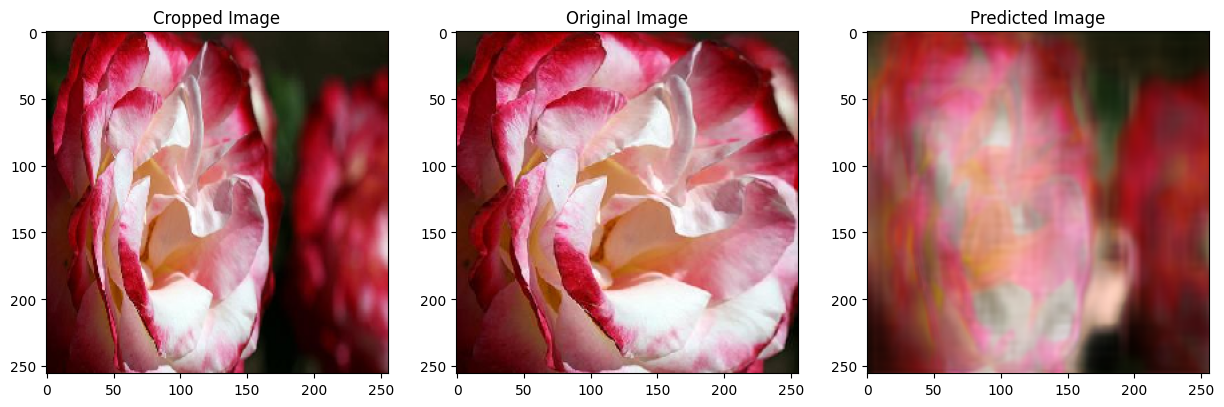

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


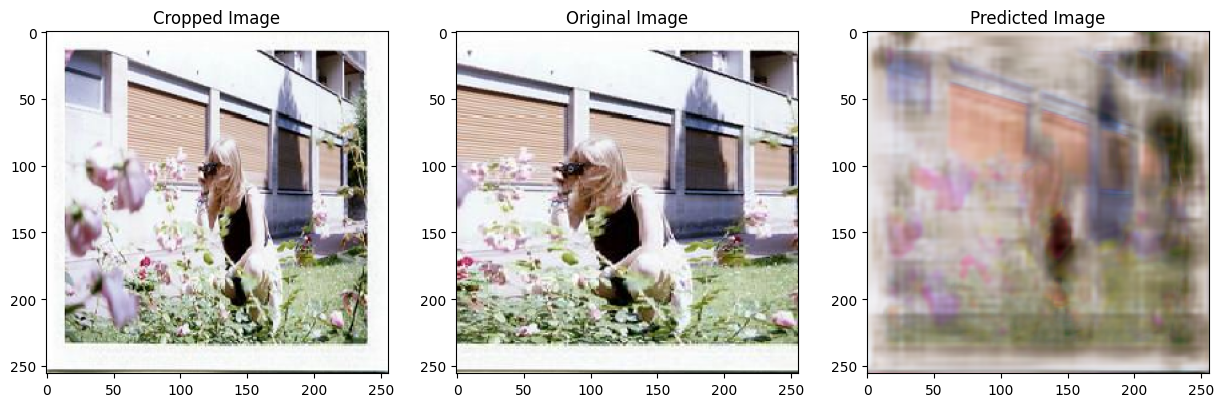

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


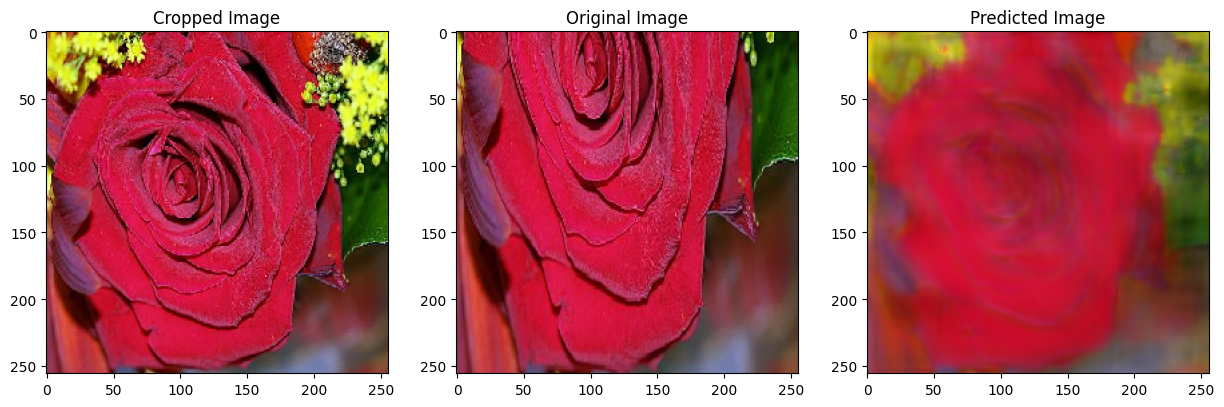

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


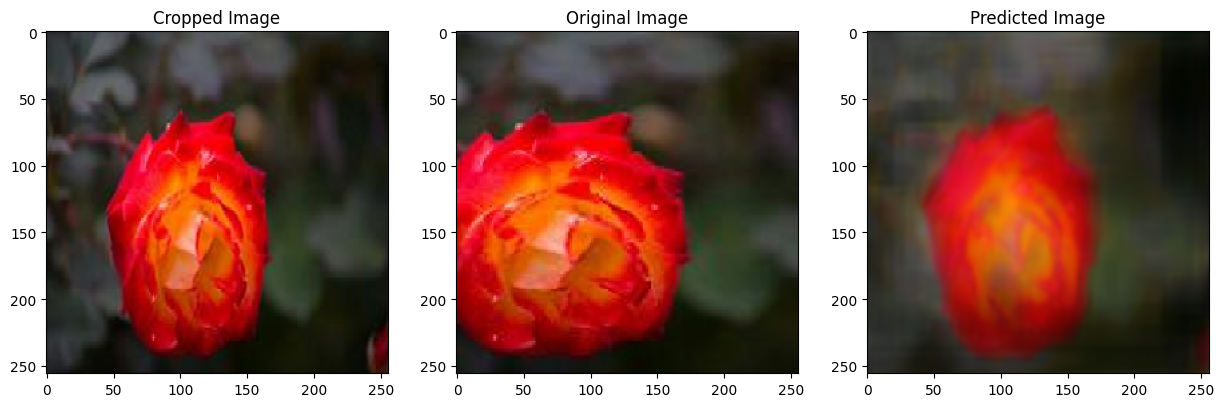

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


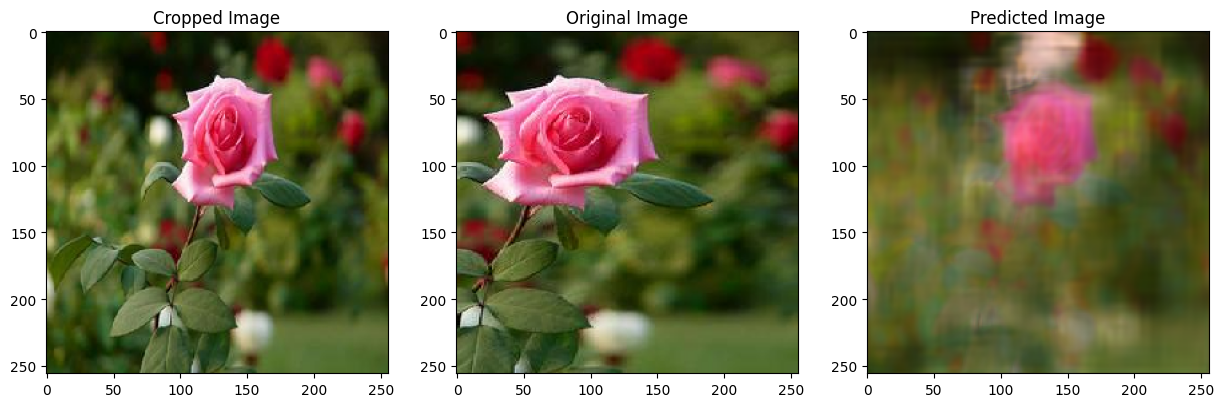

In [ ]:
# Sinov uchun bir necha rasmni tanlash
n = 5  # sinov uchun rasmlar soni
for i in range(n):
    idx = np.random.randint(0, len(X_val))
    test_img = X_val[idx]
    original_img = y_val[idx]

    predicted_img = model.predict(np.expand_dims(test_img, axis=0))[0]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Cropped Image')
    plt.imshow(array_to_img(test_img))

    plt.subplot(1, 3, 2)
    plt.title('Original Image')
    plt.imshow(array_to_img(original_img))

    plt.subplot(1, 3, 3)
    plt.title('Predicted Image')
    plt.imshow(array_to_img(predicted_img))
    plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load your model and explicitly pass the custom loss function
model = load_model('/content/image_inpainting_model.h5', custom_objects={'mse': MeanSquaredError()})


In [ ]:
from tensorflow.keras import models
from tensorflow.keras.losses import MeanSquaredError

# Assume you have already built and compiled your model
model.compile(optimizer='adam', loss=MeanSquaredError())

# Save the model with the correct configuration
model.save('image_completion_model.h5')
